# Credit Card  Fraud  Detection

## DATA ACQUISITION

### DATA SOURCE

__[DATA ACQUISITION
DATA SOURCE
Credit Card Fraud Detection Anonymized credit card transactions labeled as fraudulent or genuine](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)__

### METADATA: About the Dataset

#### providers mentioned that:

#####  -The dataset contains transactions made by credit cards in September 2013 by European cardholders.

#### - providers mentioned that
    -The dataset contains transactions made by credit cards in September 2013 by European cardholders.
    -This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

    -The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

    -Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been
     transformed with PCA are 'Time' and 'Amount'.

    -Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
 
    -Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### ALGORITHM
    -Logistic regression
    -Random Forest Classifier
    -Decision trees

### Importing the required Python libraries


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



### Data Analysis

### Dataset Preprocessing

In [34]:
data=pd.read_csv('creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0
5,2.00,-0.43,0.96,1.14,-0.17,0.42,-0.03,0.48,0.26,-0.57,...,-0.21,-0.56,-0.03,-0.37,-0.23,0.11,0.25,0.08,3.67,0
6,4.00,1.23,0.14,0.05,1.20,0.19,0.27,-0.01,0.08,0.46,...,-0.17,-0.27,-0.15,-0.78,0.75,-0.26,0.03,0.01,4.99,0
7,7.00,-0.64,1.42,1.07,-0.49,0.95,0.43,1.12,-3.81,0.62,...,1.94,-1.02,0.06,-0.65,-0.42,-0.05,-1.21,-1.09,40.80,0
8,7.00,-0.89,0.29,-0.11,-0.27,2.67,3.72,0.37,0.85,-0.39,...,-0.07,-0.27,-0.20,1.01,0.37,-0.38,0.01,0.14,93.20,0
9,9.00,-0.34,1.12,1.04,-0.22,0.50,-0.25,0.65,0.07,-0.74,...,-0.25,-0.63,-0.12,-0.39,-0.07,0.09,0.25,0.08,3.68,0


In [35]:


data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,"284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00",...,"284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00"
mean,"94,813.86",0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,"47,488.15",1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,"54,201.50",-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,"84,692.00",0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,"139,320.50",1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,"172,792.00",2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,"25,691.16",1.00


In [36]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
len(data)

284807

In [38]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

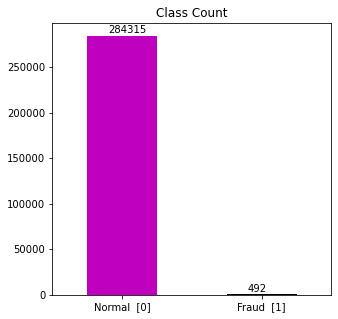

In [39]:
diff_class = data['Class'].value_counts()
diff_class.plot(kind='bar', color=['m', 'k'], figsize=(5, 5))
plt.xticks(range(2), ['Normal  [0]', 'Fraud  [1]'], rotation=0)
for i, v in enumerate(diff_class):
    plt.text(i-0.1, v+3000, str(v))
plt.title('Class Count')
plt.show()

In [43]:

#plt.figure(figsize=(28,28))
#_=sns.heatmap(data.corr(),annot=True)

In [44]:

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,"284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00",...,"284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00"
mean,"94,813.86",0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,"47,488.15",1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,"54,201.50",-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,"84,692.00",0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,"139,320.50",1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,"172,792.00",2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,"25,691.16",1.00


In [10]:
data=data.drop('Time',axis=1)

### Dataset Train/Test Split

In [12]:
x = data.drop('Class', axis = 1)
y = data['Class']

In [18]:
x.shape()

The shape of X_train is: (227845, 29)
The shape of X_test is: (56962, 29)
The shape of y_train is: (227845,)
The shape of y_test is: (56962,)


In [23]:
y.shape

(284807,)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,shuffle=True)

In [25]:
print("The shape of X_train is:",x_train.shape)
print("The shape of X_test is:",x_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (227845, 29)
The shape of X_test is: (56962, 29)
The shape of y_train is: (227845,)
The shape of y_test is: (56962,)


### Build a Logistic Regression  model

### Build a Decision Tree Classifier model

### Build a Random Forest  Classifier model

### Evaluation
